# Apresentação ✒️

Notebook relacionado ao estudo de análise de componentes principais (PCA). PCA se refere a uma técnica de redução de redução de dimensionalidade, na qual busca-se reduzir a quantidade de dimensão presente em um conjunto de dado por meio da formação de componentes que consigam abrigar entorno de si uma ampla quantidade de informação, com base nas features anteriores correlacionadas.

Nesse sentido, cria-se através dessa técnica, componenetes que consigam explicar o conjunto de dados a partir de si, sem precisar da dimensionalidade anterior, uma vez que as features estarão neles condensadas.

Como caso de estudo irei utilizar um dataset sobre os dados sócioeconômicos da cidade de São Paulo, por meio do qual buscarei criar um novo dataset com menor dimensionalidade, utilizando o PCA. Além disso, irei realizar por meio desse, uma pequena análise exploratória com a finalidade de verificar a qualidade dos dados e a relação entre si.

## Biblioteca 📚

In [1]:
!pip install factor_analyzer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 915.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity



## Carregando o dataset 💾

In [3]:
file_path = "/content/distritos_sp.csv"

In [4]:
df_raw = pd.read_csv(file_path)

In [5]:
df_raw.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


In [6]:
df_raw.shape

(96, 11)

## Verificando a qualidade dos dados

In [7]:
df_raw.isna().sum()

cod_ibge        0
distritos       0
renda           0
quota           0
escolaridade    0
idade           0
mortalidade     0
txcresc         0
causasext       0
favel           0
denspop         0
dtype: int64

In [8]:
df_raw.duplicated().sum()

0

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [10]:
df = df_raw.drop('cod_ibge', axis = 1)

In [11]:
df.head()

,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


## Análise exploratória

In [12]:
# Verificando os dados estatísticos do dataframe.

# Por meio dele, pode-se compreender que a média e a mediana,
# de forma geral, estão próximas. Isso indica que no presente
# dataset não há a presença signficativa de outliers.

df.describe()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1856.218750,30.478021,7.075000,27.395833,15.992812,0.041146,71.086667,5.932187,99.860104
std,970.774441,23.040243,1.008908,4.385332,4.994409,3.509652,23.315169,7.883762,49.606814
min,159.000000,0.610000,4.800000,20.000000,6.460000,-6.240000,22.680000,0.000000,0.370000
25%,1150.000000,12.400000,6.300000,23.000000,12.960000,-2.042500,56.417499,0.000000,64.317497
50%,1628.000000,24.304999,7.000000,27.000000,16.230000,-0.835000,70.395000,3.015000,96.165001
75%,2315.500000,40.989999,7.850000,31.000000,18.720001,1.342500,82.370001,7.837500,136.222500
max,5146.000000,104.730003,9.200000,36.000000,44.250000,18.120001,127.370003,45.689999,249.600006


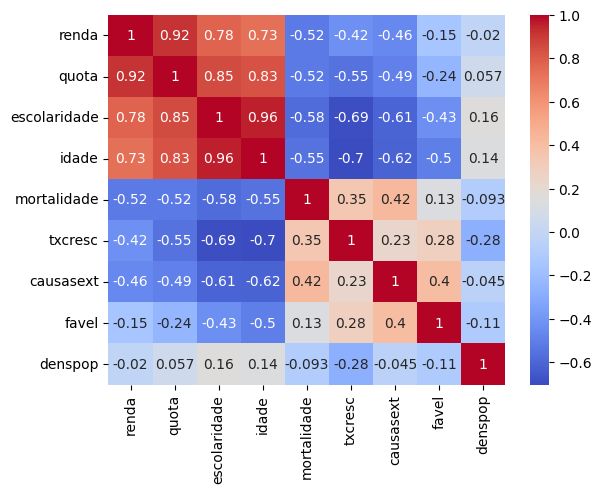

<Figure size 1500x1000 with 0 Axes>

In [13]:
# Matriz de correlação :

"""
Matrz de correlação que demonstra como as features presentes
no dataset se relacionam. Pode-se compreender que a renda apresenta
uma relação positiva com a escolaridade, podendo indicar que a primeira
é diretamente proporcional ao nível da segunda, enquanto que, por outro
lado há o oposto no que se refere à mortalidade.
"""

corr_matrix = df.drop('distritos', axis = 1).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(15, 10))
plt.show()

In [14]:
# Criando uma nova feature para realizar a eploração dos dados entre si.
# Devido à quantidade de muitos valores por renda ela se fez necessário,
# como forma de criar faixas por meio das quais permite-se identificar
# melhor o quão um determinado nível de renda média implica em outros
# fatores, como mortalidade ou é implicada por outras, como escolaridade.

bins = [0, 1500, 3000, float('inf')]
labels = ['Inferior a R$ 1500', 'Entre R$ 1500 e R$ 3000', 'Superior a R$ 3000']

# Criando a coluna 'faixa_renda'
df['faixa_renda'] = pd.cut(df['renda'], bins=bins, labels=labels, right=False)

In [15]:
df.head()

,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,faixa_renda
0,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,Entre R$ 1500 e R$ 3000
1,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,Superior a R$ 3000
2,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,Inferior a R$ 1500
3,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,Inferior a R$ 1500
4,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,Inferior a R$ 1500


In [16]:
# Mensurando a proporção de faixas de renda presentes
# na cidade de SP.

df['faixa_renda'].value_counts()

faixa_renda
Inferior a R$ 1500         44
Entre R$ 1500 e R$ 3000    40
Superior a R$ 3000         12
Name: count, dtype: int64

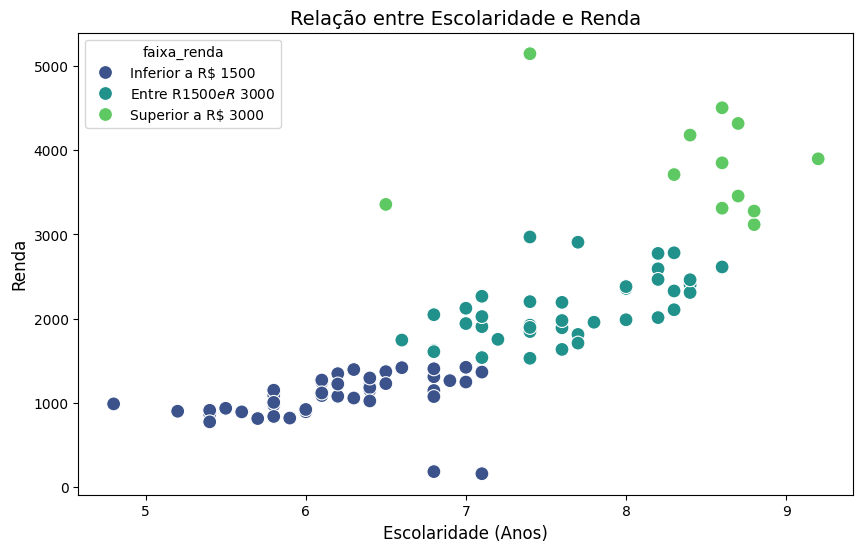

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='escolaridade', y='renda', hue='faixa_renda', data=df, palette='viridis', s=100)
plt.title('Relação entre Escolaridade e Renda', fontsize=14)
plt.xlabel('Escolaridade (Anos)', fontsize=12)
plt.ylabel('Renda', fontsize=12)
plt.show()

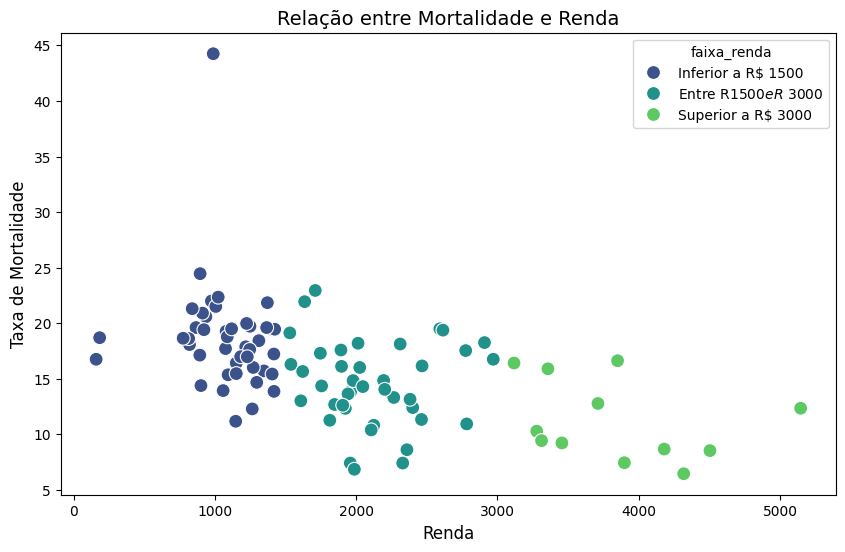

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='renda', y='mortalidade', hue='faixa_renda', data=df, palette='viridis', s=100)
plt.title('Relação entre Mortalidade e Renda', fontsize=14)
plt.xlabel('Renda', fontsize=12)
plt.ylabel('Taxa de Mortalidade', fontsize=12)
plt.show()

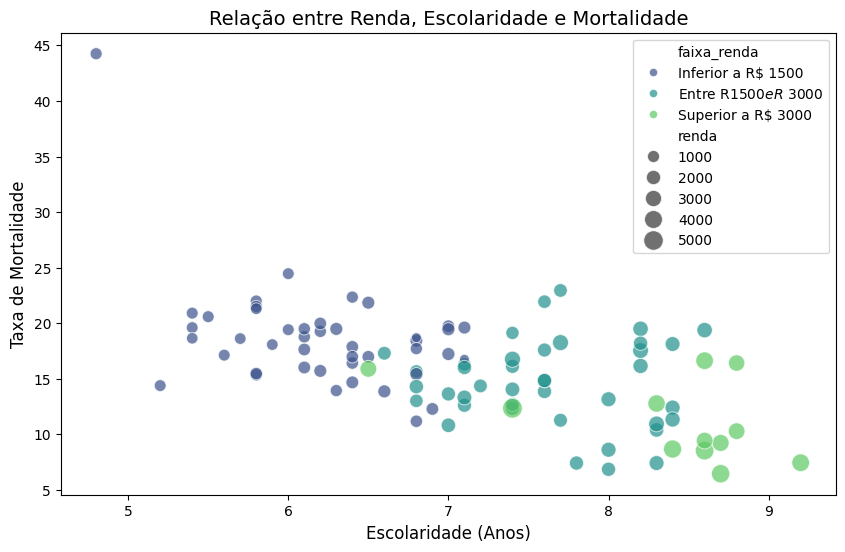

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='escolaridade', y='mortalidade', hue='faixa_renda', size='renda',
                data=df, palette='viridis', sizes=(50, 200), alpha=0.7)
plt.title('Relação entre Renda, Escolaridade e Mortalidade', fontsize=14)
plt.xlabel('Escolaridade (Anos)', fontsize=12)
plt.ylabel('Taxa de Mortalidade', fontsize=12)
plt.show()

In [20]:
txcresc_stats = df.groupby('faixa_renda')['txcresc'].agg(['mean', 'std', 'min', 'max'])

txcresc_stats

,mean,std,min,max
faixa_renda,,,,
Inferior a R$ 1500,2.110227,3.903571,-4.80,18.120001
Entre R$ 1500 e R$ 3000,-1.729000,1.662068,-6.24,2.760000
Superior a R$ 3000,-1.645000,2.323616,-3.80,4.930000


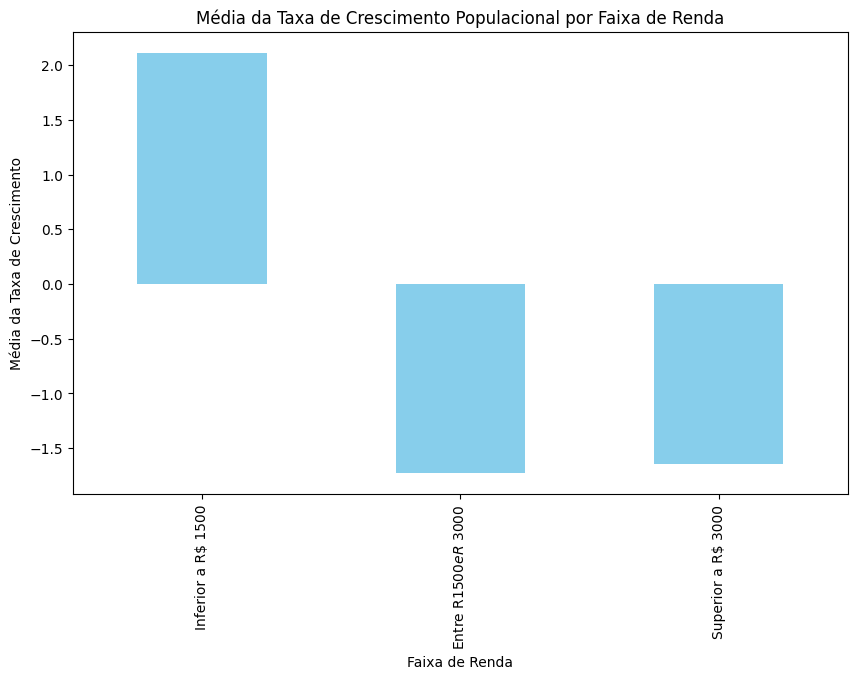

In [21]:
txcresc_stats['mean'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Média da Taxa de Crescimento Populacional por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média da Taxa de Crescimento')
plt.show()

In [22]:
denspop_stats = df.groupby('faixa_renda')['denspop'].agg(['mean', 'std', 'min', 'max'])

denspop_stats

,mean,std,min,max
faixa_renda,,,,
Inferior a R$ 1500,100.446818,50.782933,0.370000,194.660004
Entre R$ 1500 e R$ 3000,100.724500,49.936776,25.450001,249.600006
Superior a R$ 3000,94.827501,47.943060,33.820000,170.080002


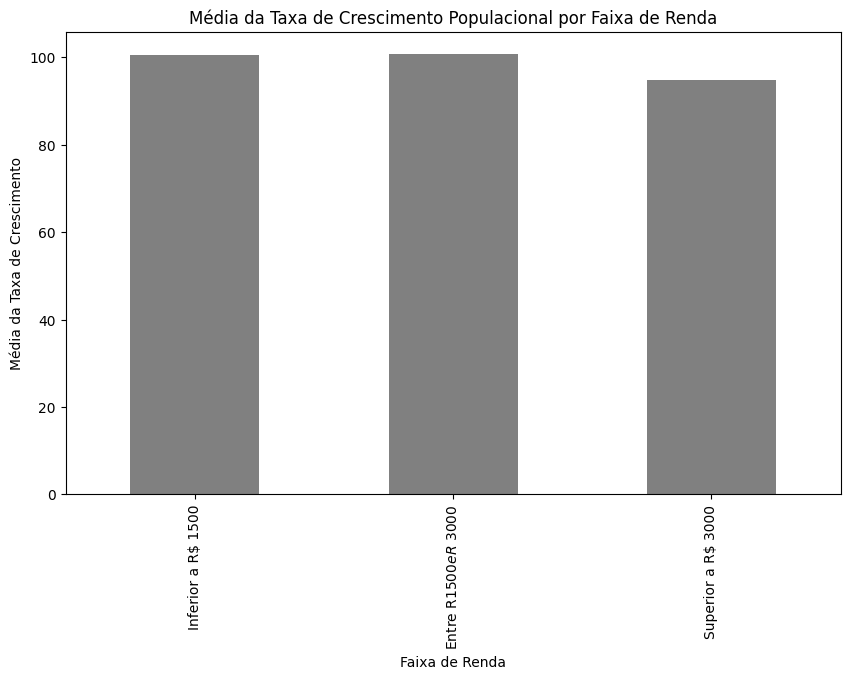

In [23]:
denspop_stats['mean'].plot(kind='bar', figsize=(10, 6), color='gray')
plt.title('Média da Taxa de Crescimento Populacional por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média da Taxa de Crescimento')
plt.show()

## Análise dos componentes principais (PCA)

In [24]:
# Antes do PCA, irei verificar se o conjunto de dados presentes
# pode ser sujeito à análise, através do calculo da esfericidade de Barlett.

# Por meio dela, pode-se saber através do valor-p,
# índice de significância estatística, se o conjunto
# de dados presentes pode ser sujeito a uma análise
# de componentes principais (PCA) ou não.

# O valor-p mensura se a matriz formada pelo conjunto é
# significativamente diferente de uma matriz de identidade
# ou não. Caso não seja, concebe-se que seus dados não apresentam
# correlações lineares entre si, o que invalidaria o uso do PCA.

# Não obstante, nesse cenário, o valor-p seria acima do valor
# de 5 % convencionalmente adotado, para que seja rejeitado
# a hipótese nula, que no presente caso seria o conjunto
# de dados ser útil para passar pelo PCA.

q_quadrado, pvalue = calculate_bartlett_sphericity(df.drop(['distritos', 'faixa_renda'], axis = 1))

print(f'Q-Quadrado: {q_quadrado:.4f}')
print(f'P-Valor: {pvalue:.4f}')

Q-Quadrado: 748.1593
P-Valor: 0.0000


In [25]:
# Normalizando os dados :

# Havendo verificado o dataset pela esfericidade de Barlett
# e tendo sido aprovado, agora os dados precisam ser normalizados,
# para que fiquem sujeitos a um mesmo intervalo.

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['distritos', 'faixa_renda'],
                                         axis = 1))

In [26]:
# Criando o dataframe a partir do dataset escalonado.

df_scaled = pd.DataFrame(df_scaled, columns=df.drop(['distritos',
                                                     'faixa_renda'],
                                                    axis = 1).columns)

In [27]:
# Visualizando o dataframe escalonado.

df_scaled.head()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651


In [28]:
# Instanciando um PCA com a capacidade explicativa
# de 80%. Para a especificação da quantidade de componentes
# pode-se determinar um valor decimal ou numéricos,
# que se relacionam à quantidade de fatores que deseja-se
# que estejam presentes.

# Aqui estou utilizando a abordagem com números em decimal,
# pois quero um PCA que consiga explicar cerca de 80% dos dados.

pca = PCA(n_components=0.8)

df_pca = pca.fit_transform(df_scaled)

In [29]:
pd.DataFrame(df_pca).head()


,0,1,2,3
0,1.519105,-0.761299,0.440370,0.256326
1,3.985600,1.555514,0.313021,0.070926
2,-2.681205,2.356295,3.872196,3.061874
3,-0.574202,-1.061710,-0.214948,-0.121274
4,-0.457007,-1.688282,-0.110352,0.089602


In [30]:
# Checando a variância explicada pelos fatores gerados.

pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185])

In [31]:
# Verificando a variância acumulada.

"""
Por meio do cálculo da variância acumulada, pode-se
compreender o nível de explicação dos fatores presentes.
Assim, um único fator explica 55 % do dataset, dois fatores
explicam 68%, enquanto que três fatores explicam aproximadamente
80% do dataset.
"""

pca.explained_variance_ratio_.cumsum()

array([0.55067008, 0.68004098, 0.790747  , 0.87119884])

In [32]:
# Verificando quantas variáveis do dataset são
# explicadas por cada fator. Nota-se que o primeiro
# fator explica cerca de 2.2 das variáveis presentes,
# enquanto que o segunda fator cerca de 0.51.

# Esses valores fazem sentido, se relembrar que o primeiro
# fator explica cerca de 55% das features.

# Os valores encontrados aqui se referem aos autovalores,
# que formam os autovetores de cada fator.

pca.explained_variance_ratio_ * 4

array([2.20268031, 0.51748362, 0.44282405, 0.32180739])

In [33]:
# Encontrando os pesos encontrados pelo PCA.
# Os pesos se referem ao quanto uma variável contribuiu
# para a formação daquele autovetor, que se refere
# ao fator que será criado em substituição
# da variável anterior.

pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578]])

In [36]:
# Formando um dataframe para facilitar a visualização :

"""
No eixo horizontal referente a cada autovetor, encontra-se
os pesos que cada variável possui em relação a ele. Nesse sentido,
pode-se compreender que o auto vetor 1, que formará o fator 1, é mais influenciado
pela escolaridade do que densidade populacional, enquanto essa, por outro lado,
é influenciada mais, ainda que em aspecto negativo, com o auto vetor 2.
"""

pd.DataFrame(pca.components_, columns=df_scaled.columns, index = [f'Autovetor {i + 1}' for i in range(4)])

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
Autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
Autovetor 2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
Autovetor 3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
Autovetor 4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486


In [44]:
# Para compreendermos a correlação que cada auto vetor
# terá com cada feature do dataset anterior, comprrender
# o quanto explica dessas, pode-se elaborar o dataframe
# da carga fatorial, que permite a criação de uma matriz
# de correlação que mensura a relação de cada feature
# para cada auto vetor.

autovalores = pca.explained_variance_ratio_ * 4

raiz_autovalores = np.sqrt(autovalores)

carga_fatorial = pd.DataFrame((pca.components_.T * raiz_autovalores),
                               index=df_scaled.columns,
                               columns=[f'Autovetor {i + 1}' for i in range(4)])

carga_fatorial

,Autovetor 1,Autovetor 2,Autovetor 3,Autovetor 4
renda,0.554751,0.245981,-0.115095,-0.035961
quota,0.600404,0.150969,-0.103154,-0.079398
escolaridade,0.644362,-0.016396,-0.006227,-0.047983
idade,0.640090,-0.043631,0.042245,-0.071993
mortalidade,-0.437133,-0.117756,0.115652,-0.329134
txcresc,-0.464521,0.224964,0.184833,0.257044
causasext,-0.444385,-0.029273,-0.292212,-0.278167
favel,-0.304790,0.295227,-0.457923,0.090080
denspop,0.110854,-0.528699,-0.272935,0.216410


In [45]:
# Verificando a comunalidade de cada uma das variáveis.
# A comunalidade representa a variância total compartilhada
# de cada uma das variáveis em relação aos fatores extraídos.
# Ela informa o quão a combinação dos fatores conseguem explicar
# uma determinada variável.

carga_fatorial['comunalidade'] = (carga_fatorial ** 2).sum(axis=1)

carga_fatorial


,Autovetor 1,Autovetor 2,Autovetor 3,Autovetor 4,comunalidade
renda,0.554751,0.245981,-0.115095,-0.035961,0.382795
quota,0.600404,0.150969,-0.103154,-0.079398,0.400221
escolaridade,0.644362,-0.016396,-0.006227,-0.047983,0.417813
idade,0.640090,-0.043631,0.042245,-0.071993,0.418587
mortalidade,-0.437133,-0.117756,0.115652,-0.329134,0.326656
txcresc,-0.464521,0.224964,0.184833,0.257044,0.366623
causasext,-0.444385,-0.029273,-0.292212,-0.278167,0.361099
favel,-0.304790,0.295227,-0.457923,0.090080,0.397864
denspop,0.110854,-0.528699,-0.272935,0.216410,0.413137
